In [1]:
#Autores: David Valencia, Karla Salas con ayuda del profesor Mijangos
#Para ver las palabras
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
#Para el corpus
import sys
sys.path.append('..')
from src.data import Data 

[nltk_data] Downloading package punkt to /home/karla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/karla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Corpus
El corpus consiste de 9 archivos, cada uno corresponde a un canal de Youtube.
Los canales utilizados para esta tarea son:

|           id            |    canal      |
|-------------------------|---------------|
|UCshVTOdmZLdLj8LTV1j_0uw | tedespañol    |
|UCZcvCpFcLxOKGbMocVgLjEA | kurzgesagt    |
|UC3uPK6zOTe0HOfcIkuzII0Q | disneyplusla  |
|UCBSs9x2KzSLhyyA9IKyt4YA | netflixanime  |
|UCrVhY_d0L0qayRhMsRlPBOA | 31minutostv   |
|UCJQQVLyM6wtPleV4wFBK06g | visualpolitik |
|UC_Zc2fmbDpu_arkwvCDcX5g | cocina        |
|UCyQqzYXQBUWgBTn4pw_fFSQ | auronplay     |
|UCX6b17PVsYBQ0ip5gyeme-Q | crash course  |

Elegimos estos canales porque estan subtitulados y hablan de una diversidad de temas distintos.

Cada archivo esta compuesto de videos, que contienen subtitulos, que incluyen momento de inicio y final.
Ej.
```javascript
{
  "id": "L9YhoRatRzE",
  "original_title": "Siempre Fui Yo | Adelanto | Disney+",
  "subtitles": [
    {
      "start": "0.13",
      "dur": "3.77",
      "text": "tu papá tuvo un accidente"
    },
    ...
  ]
}
```


# Limpiamos y tokenizamos
Como la finalidad del proyecto es que dado una frase, encontremos el subtítulo de algún video que la contenga, no nos conviene hacer stemming o lematización basta con tokenizar las palabras, pues usaremos RI.
Dada la estructura de nuestro corpus ya lo tenemos tokenizado por oraciones, lo que nos da un contexto implícito, si en un futuro deseamos hacer la búsqueda más flexible.


In [2]:
videos = Data("../corpus/data")
videos.corpus[0][0]['subtitles'][0]#Nota: no print de todo

{'start': '13.596', 'dur': '1.752', 'text': '¿Adónde vas, Momo?'}

In [3]:
videos.clean_videos()
videos.get_all_subtitles()
videos.all_subtitles[0]

100%|██████████| 9/9 [00:00<00:00, 79.55it/s]


['adónde', 'vas', 'momo']

In [4]:
videos.all_subtitles[1000]

['viene', 'dragon', 'kid', 'maestra', 'rayo', 'kungfu']

# Análisis

Corpus limpio


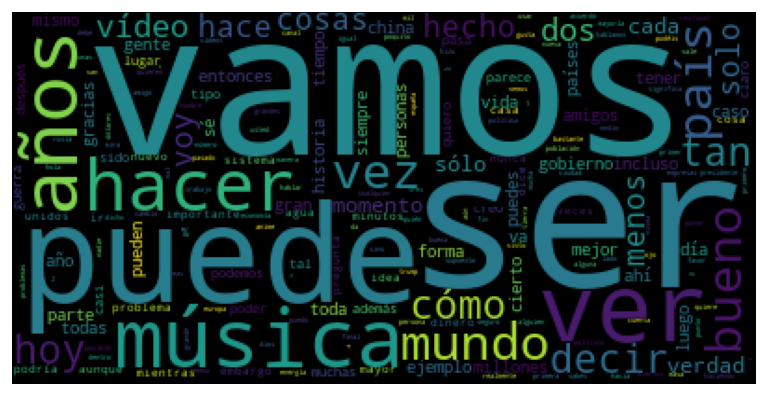

In [5]:
def show_words():
    '''
    Usa la librería wordcloud para mostrar una gráfica
    de las palabras más usadasen un corpus

    Args:
        word (str): lista de palabras
    '''
    word = videos.flatten()
    mycloud = WordCloud()
    mycloud.generate_from_frequencies(Counter(word))

    plt.figure(figsize=(8,6), dpi=120)
    plt.imshow(mycloud)
    plt.axis("off")
    plt.show()

print("Corpus limpio")
show_words()

In [6]:
term_list = videos.get_frequencies()
term_list

,Frequency
Token,
vamos,9182
ser,8532
puede,7372
ver,7341
música,7142
...,...
luso,1
ob,1
colaboraré,1


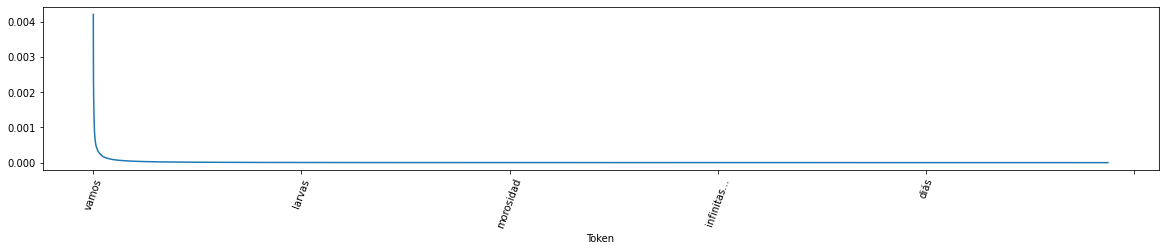

In [7]:
#Calcular probabilidad
term_list['Probability'] = term_list/term_list.sum()

#Visualizar las probabilidades
term_list['Probability'].sort_values(ascending=False).plot(figsize=(20,3), rot=70)
plt.show()

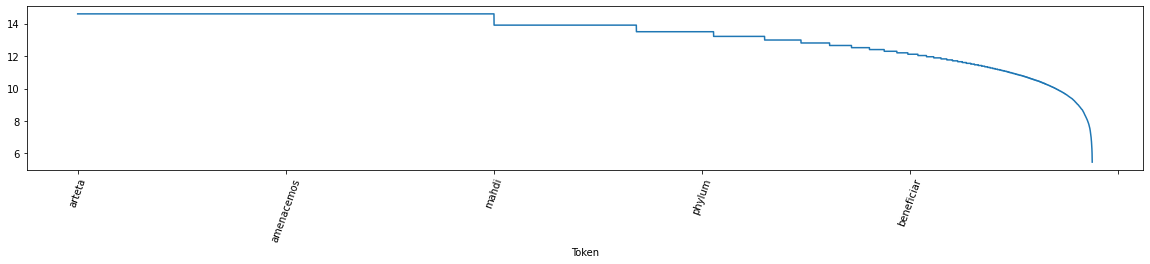

In [8]:
#Calcular información
term_list['Information'] = -np.log(term_list['Probability'])

#Visualizar la información
term_list['Information'].sort_values(ascending=False).plot(figsize=(20,3), rot=70)
plt.show()

In [9]:
#Correlación de valores
term_list.corr()


,Frequency,Probability,Information
Frequency,1.00000,1.00000,-0.42595
Probability,1.00000,1.00000,-0.42595
Information,-0.42595,-0.42595,1.00000


El análisis continua en el notebook de EvalAgrupar